# visualizing music mood on spotify! :)

i love spotify and i absolutely love listening to music.
this notebook looks at how songs differ in mood and energy using spotify’s audio features, focusing on how music feels rather than popularity.


In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv("dataset.csv")
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [33]:
df[["valence", "energy", "popularity"]].describe()


,valence,energy,popularity
count,114000.000000,114000.000000,114000.000000
mean,0.474068,0.641383,33.238535
std,0.259261,0.251529,22.305078
min,0.000000,0.000000,0.000000
25%,0.260000,0.472000,17.000000
50%,0.464000,0.685000,35.000000
75%,0.683000,0.854000,50.000000
max,0.995000,1.000000,100.000000


In [35]:
sns.set_style("whitegrid")
sns.set_palette("pastel")


## mood map of spotify tracks

this plot shows how songs are distributed based on emotional tone (valence)
and intensity (energy). together, they create a rough “mood map” of spotify’s catalog.


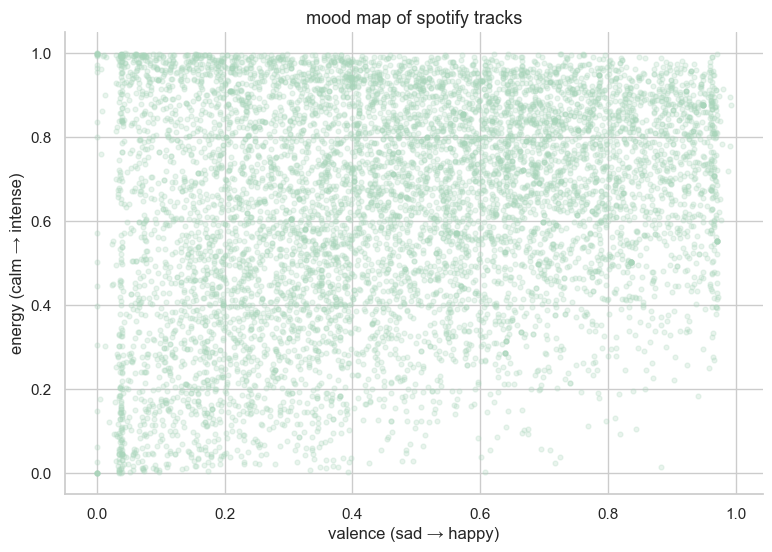

In [43]:
plt.figure(figsize=(9, 6))

plt.scatter(
    sample_df["valence"],
    sample_df["energy"],
    alpha=0.25,
    s=12,
    color="#A8D5BA"   
)

plt.title("mood map of spotify tracks", fontsize=13)
plt.xlabel("valence (sad → happy)")
plt.ylabel("energy (calm → intense)")

sns.despine()
plt.show()


most tracks sit somewhere in the middle of both valence and energy.
extreme moods exist, but spotify’s catalog is mostly balanced,
covering a wide emotional range.


In [45]:
# keep only what we need for this plot
dance_df = df[["danceability", "energy"]].dropna()

dance_df.head()


,danceability,energy
0,0.676,0.4610
1,0.420,0.1660
2,0.438,0.3590
3,0.266,0.0596
4,0.618,0.4430


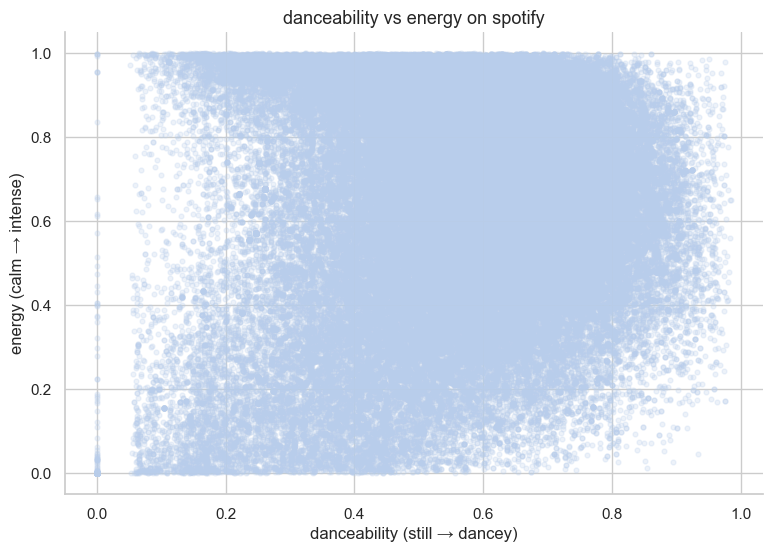

In [47]:
plt.figure(figsize=(9, 6))

plt.scatter(
    dance_df["danceability"],
    dance_df["energy"],
    alpha=0.25,
    s=12,
    color="#B8CDEB"  # soft pastel blue
)

plt.title("danceability vs energy on spotify", fontsize=13)
plt.xlabel("danceability (still → dancey)")
plt.ylabel("energy (calm → intense)")

sns.despine()
plt.show()


most songs cluster around medium to high energy, but danceability varies a lot.
this shows that high energy music isn’t always made for dancing some songs are intense but not sync or like with rhythm.


## how music mood changes across genres

different genres often feel different emotionally.
here, i look at how *valence* (sad -> happy) varies across popular spotify genres.


In [55]:
# keep only needed columns
genre_df = df[["track_genre", "valence"]].dropna()

# keep top 10 most common genres
top_genres = genre_df["track_genre"].value_counts().head(10).index
genre_df = genre_df[genre_df["track_genre"].isin(top_genres)]


/var/folders/5x/v_15gh9s3qgdl6sgp313gglm0000gn/T/ipykernel_79439/2688316304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


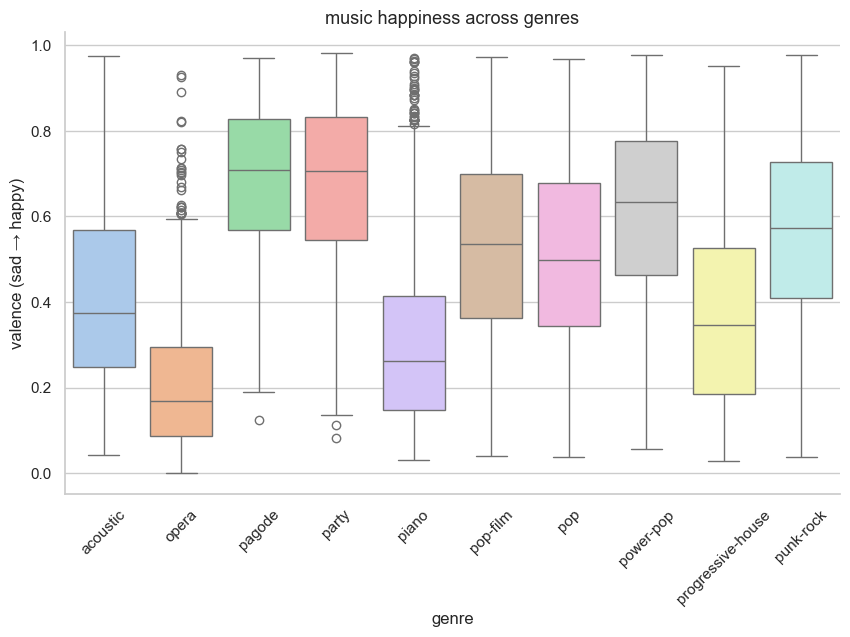

In [57]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=genre_df,
    x="track_genre",
    y="valence",
    palette="pastel"
)

plt.title("music happiness across genres", fontsize=13)
plt.xlabel("genre")
plt.ylabel("valence (sad → happy)")

plt.xticks(rotation=45)
sns.despine()
plt.show()


this confirms that genre plays a big role in how music feels.
even without lyrics, audio features capture emotional differences across styles.
